In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('2012_SAT_Results.csv')

I collected data on SAT scores by composition in the New York City area, including their school name and average scores.

In [168]:
df.head()

,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,Sum,Sum of scores,DBN
12,HIGH SCHOOL OF HOSPITALITY MANAGEMENT,58,374,375,362,1111,1111,1M450
13,PACE HIGH SCHOOL,85,423,438,432,1293,1293,1M450
14,URBAN ASSEMBLY SCHOOL OF DESIGN AND CONSTRUCTI...,48,404,449,416,1269,1269,1M450
15,"FACING HISTORY SCHOOL, THE",76,353,358,340,1051,1051,1M450
16,"URBAN ASSEMBLY ACADEMY OF GOVERNMENT AND LAW, THE",50,375,388,385,1148,1148,1M450


I first ensured there were enough data points

In [3]:
print(len(df))

478


In [4]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
df['SCHOOL NAME']

0      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES
1                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL
2                         EAST SIDE COMMUNITY SCHOOL
3                          FORSYTH SATELLITE ACADEMY
4                            MARTA VALLE HIGH SCHOOL
                           ...                      
473                 P.S. X012 LEWIS AND CLARK SCHOOL
474          J. M. RAPPORT SCHOOL CAREER DEVELOPMENT
475       SCHOOL FOR COOPERATIVE TECHNICAL EDUCATION
476                              GED PLUS s CITYWIDE
477                                  PHOENIX ACADEMY
Name: SCHOOL NAME, Length: 478, dtype: object

In [29]:
df['SCHOOL NAME'][4]

'MARTA VALLE HIGH SCHOOL'

In [6]:
df['Num of SAT Test Takers'].value_counts()

s       57
54      10
9        8
72       8
48       8
        ..
1277     1
263      1
189      1
97       1
23       1
Name: Num of SAT Test Takers, Length: 175, dtype: int64

In [7]:
df.drop(df[df['Num of SAT Test Takers'] == 's'].index, inplace = True)
print(df)

        DBN                                        SCHOOL NAME  \
0    01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1    01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2    01M450                         EAST SIDE COMMUNITY SCHOOL   
3    01M458                          FORSYTH SATELLITE ACADEMY   
4    01M509                            MARTA VALLE HIGH SCHOOL   
..      ...                                                ...   
466  32K556  BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCE...   
467  32K564                     BUSHWICK COMMUNITY HIGH SCHOOL   
471  75Q811                                          P.S. Q811   
476  79Q950                                GED PLUS s CITYWIDE   
477  79X490                                    PHOENIX ACADEMY   

    Num of SAT Test Takers SAT Critical Reading Avg. Score  \
0                       29                             355   
1                       91                             383   
2                    

In [8]:
for col in df.columns:
    print(col, type(df[col][0]))

DBN <class 'str'>
SCHOOL NAME <class 'str'>
Num of SAT Test Takers <class 'str'>
SAT Critical Reading Avg. Score <class 'str'>
SAT Math Avg. Score <class 'str'>
SAT Writing Avg. Score <class 'str'>


In [9]:
df['Num of SAT Test Takers'] = df['Num of SAT Test Takers'].astype(int)

In [10]:
df['SAT Critical Reading Avg. Score'] = df['SAT Critical Reading Avg. Score'].astype(int)

In [11]:
df['SAT Math Avg. Score'] = df['SAT Math Avg. Score'].astype(int)

In [12]:
df['SAT Writing Avg. Score'] = df['SAT Writing Avg. Score'].astype(int)

In [13]:
for col in df.columns:
    print(col, type(df[col][0]))

DBN <class 'str'>
SCHOOL NAME <class 'str'>
Num of SAT Test Takers <class 'numpy.int64'>
SAT Critical Reading Avg. Score <class 'numpy.int64'>
SAT Math Avg. Score <class 'numpy.int64'>
SAT Writing Avg. Score <class 'numpy.int64'>


In [14]:
df.describe()

,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
count,421.000000,421.000000,421.000000,421.000000
mean,110.320665,400.850356,413.368171,393.985748
std,155.534254,56.802783,64.684655,58.635109
min,6.000000,279.000000,312.000000,286.000000
25%,41.000000,368.000000,371.000000,360.000000
50%,62.000000,391.000000,395.000000,381.000000
75%,95.000000,416.000000,437.000000,411.000000
max,1277.000000,679.000000,735.000000,682.000000


Text(0, 0.5, 'Number of Observations')

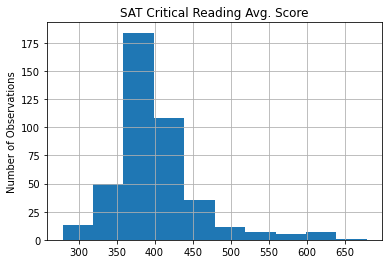

In [26]:
import matplotlib.pyplot as plt

df.hist(column='SAT Critical Reading Avg. Score')
plt.ylabel('Number of Observations')

Text(0, 0.5, 'Number of Observations')

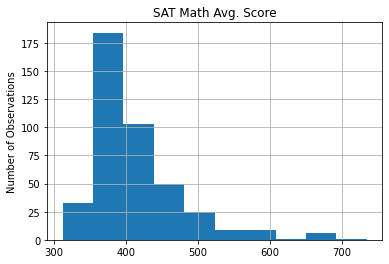

In [27]:
import matplotlib.pyplot as plt

df.hist(column='SAT Math Avg. Score')
plt.ylabel('Number of Observations')

Text(0, 0.5, 'Number of Observations')

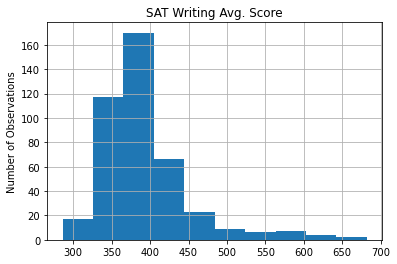

In [28]:
import matplotlib.pyplot as plt

df.hist(column='SAT Writing Avg. Score')
plt.ylabel('Number of Observations')

In [200]:
df['Sum']=df.iloc[:,[3,4,5]].sum(axis=1)

I then added the sum of the compositions in order to easily compare each schools. 'Sum of scores' is for this dataset and 'sum' will allow me to merge this dataset with another.

In [43]:
df.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,Sum,Sum of scores
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363,1122,1122
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366,1172,1172
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370,1149,1149
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359,1174,1174
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384,1207,1207


In [44]:
num_of_SAT_test_takers_counts = df['Num of SAT Test Takers'].value_counts()

In [69]:
num_of_SAT_test_takers_counts

54     10
48      8
9       8
72      8
29      7
       ..
97      1
109     1
731     1
443     1
23      1
Name: Num of SAT Test Takers, Length: 174, dtype: int64

In [74]:
df[df['Sum']<=1000]

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,Sum,Sum of scores
121,07X334,INTERNATIONAL COMMUNITY HIGH SCHOOL,34,310,324,311,945,945
169,09X365,ACADEMY FOR LANGUAGE AND TECHNOLOGY,54,315,339,297,951,951
170,09X403,BRONX INTERNATIONAL HIGH SCHOOL,49,314,312,339,965,965
184,10X268,KINGSBRIDGE INTERNATIONAL HIGH SCHOOL,52,304,356,302,962,962
187,10X342,INTERNATIONAL SCHOOL FOR LIBERAL ARTS,49,300,333,301,934,934
233,12X388,PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE,30,321,351,298,970,970
239,12X550,HIGH SCHOOL OF WORLD CULTURES,42,304,323,312,939,939
250,13K439,BROOKLYN INTERNATIONAL HIGH SCHOOL,90,305,364,312,981,981
285,15K520,PACIFIC HIGH SCHOOL,9,352,341,300,993,993
300,17K524,INTERNATIONAL HIGH SCHOOL AT PROSPECT HEIGHTS,71,287,335,291,913,913


In [75]:
df[df['Sum']<=1200]

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,Sum,Sum of scores
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363,1122,1122
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366,1172,1172
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370,1149,1149
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359,1174,1174
9,02M047,47 THE AMERICAN SIGN LANGUAGE AND ENGLISH SECO...,16,395,400,387,1182,1182
...,...,...,...,...,...,...,...,...
463,32K549,BUSHWICK SCHOOL FOR SOCIAL JUSTICE,75,348,353,334,1035,1035
464,32K552,ACADEMY OF URBAN PLANNING,67,342,364,354,1060,1060
466,32K556,BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCE...,23,347,358,350,1055,1055
467,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,24,359,317,358,1034,1034


In [88]:
df[df['Sum']>=2000]

,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,Sum,Sum of scores
48,STUYVESANT HIGH SCHOOL,832,679,735,682,2096,2096


In [91]:
df.head()

,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,Sum,Sum of scores
0,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363,1122,1122
1,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366,1172,1172
2,EAST SIDE COMMUNITY SCHOOL,70,377,402,370,1149,1149
3,FORSYTH SATELLITE ACADEMY,7,414,401,359,1174,1174
4,MARTA VALLE HIGH SCHOOL,44,390,433,384,1207,1207


<AxesSubplot:>

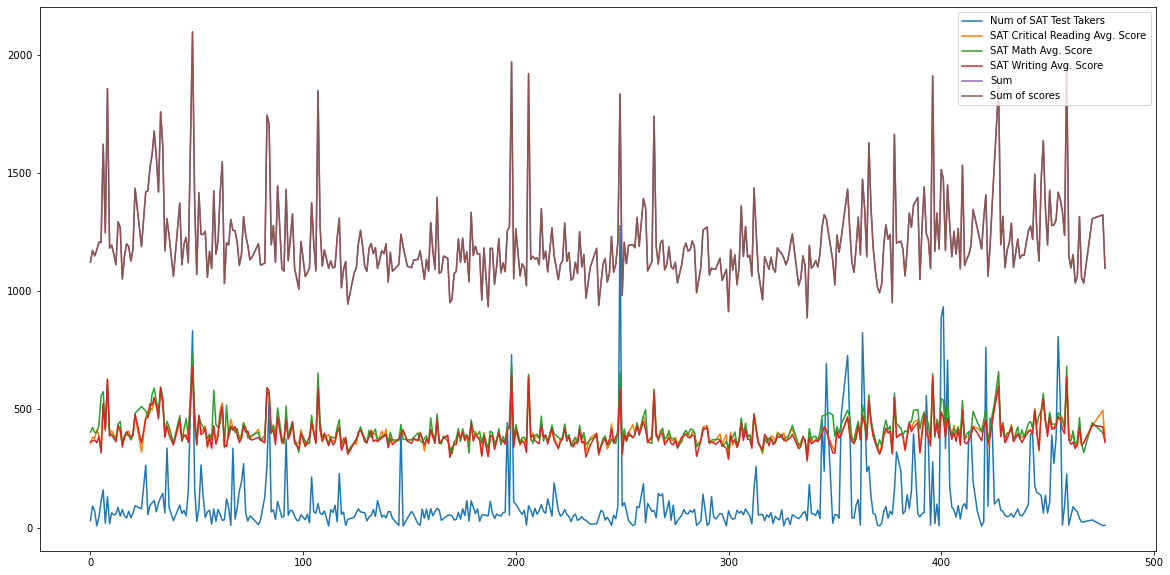

In [78]:
df.plot()

In [80]:
import matplotlib.pyplot as plt
x = df['Sum']
y = df['Num of SAT Test Takers']
print(np.corrcoef(x, y))

[[1.         0.48263871]
 [0.48263871 1.        ]]


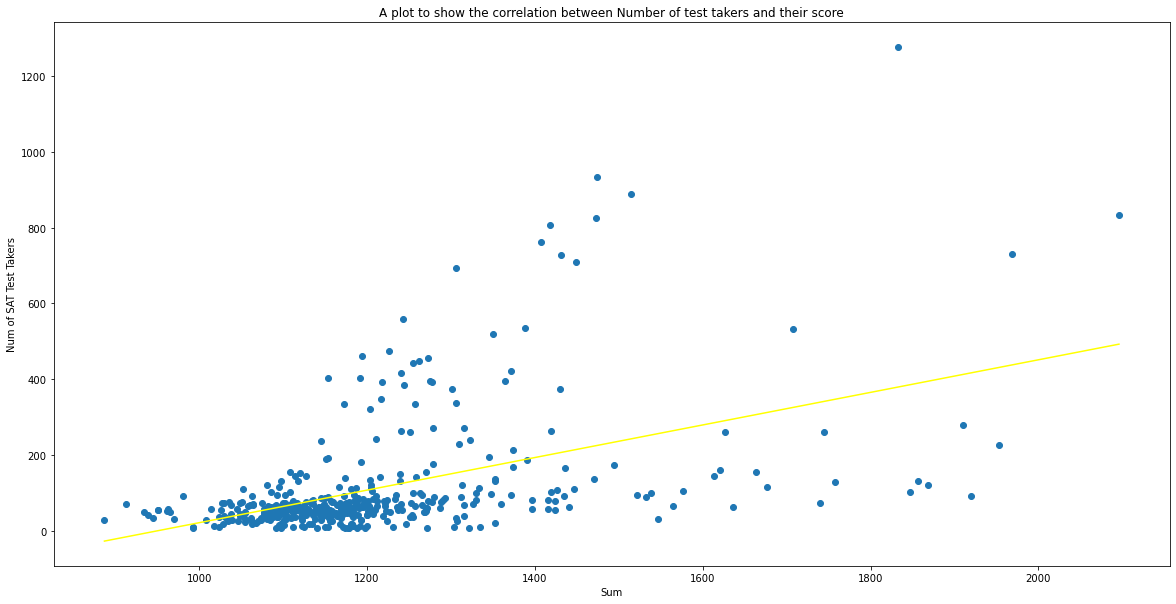

In [81]:
plt.scatter(x, y) 
plt.title('A plot to show the correlation between Number of test takers and their score')
plt.xlabel('Sum')
plt.ylabel('Num of SAT Test Takers')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='yellow')
plt.show()

Since the slope is close to 0 there is a very slight positive correlation between the number of people who took the test in each school and the average score.

In [89]:
df[df['Sum']>=1500]

,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,Sum,Sum of scores
6,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522,574,525,1621,1621
8,BARD HIGH SCHOOL EARLY COLLEGE,130,624,604,628,1856,1856
28,PROFESSIONAL PERFORMING ARTS HIGH SCHOOL,94,509,490,523,1522,1522
29,BARUCH COLLEGE CAMPUS HIGH SCHOOL,104,496,563,518,1577,1577
30,N.Y.C. LAB SCHOOL FOR COLLABORATIVE STUDIES,114,537,590,550,1677,1677
31,SCHOOL OF THE FUTURE HIGH SCHOOL,66,517,533,515,1565,1565
33,ELEANOR ROOSEVELT HIGH SCHOOL,127,572,594,592,1758,1758
34,MILLENNIUM HIGH SCHOOL,144,528,553,533,1614,1614
48,STUYVESANT HIGH SCHOOL,832,679,735,682,2096,2096
62,URBAN ACADEMY LABORATORY HIGH SCHOOL,30,527,508,512,1547,1547


In [90]:
grad = pd.read_csv("2005-2010_Graduation_Outcomes_-_School_Level.csv")
grad.head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,NaN,s,NaN,NaN,...,s,NaN,NaN,s,NaN,NaN,s,NaN,s,NaN
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3,17,30.9,45.9,...,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2,27,42.2,62.8,...,27,42.2,62.8,16,25.0,37.2,9,14.1,9,14.1
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4,37,47.4,84.1,...,37,47.4,84.1,7,9.0,15.9,15,19.2,11,14.1


In [92]:
df.head()

,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,Sum,Sum of scores
0,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363,1122,1122
1,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366,1172,1172
2,EAST SIDE COMMUNITY SCHOOL,70,377,402,370,1149,1149
3,FORSYTH SATELLITE ACADEMY,7,414,401,359,1174,1174
4,MARTA VALLE HIGH SCHOOL,44,390,433,384,1207,1207


In [150]:
grad = pd.read_csv("2005-2010_Graduation_Outcomes_-_School_Level.csv")
grad.head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,NaN,s,NaN,NaN,...,s,NaN,NaN,s,NaN,NaN,s,NaN,s,NaN
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3,17,30.9,45.9,...,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2,27,42.2,62.8,...,27,42.2,62.8,16,25.0,37.2,9,14.1,9,14.1
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4,37,47.4,84.1,...,37,47.4,84.1,7,9.0,15.9,15,19.2,11,14.1


In [152]:
grad = grad[1:]
grad['DBN'] = grad['DBN'].apply(lambda s: s[-5:])
grad

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
2,Total Cohort,1M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2,27,42.2,62.8,...,27,42.2,62.8,16,25.0,37.2,9,14.1,9,14.1
3,Total Cohort,1M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
4,Total Cohort,1M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4,37,47.4,84.1,...,37,47.4,84.1,7,9.0,15.9,15,19.2,11,14.1
5,Total Cohort,1M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2001,64,46,71.9,32,50.0,69.6,...,25,39.1,54.3,14,21.9,30.4,10,15.6,6,9.4
6,Total Cohort,1M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2002,52,33,63.5,19,36.5,57.6,...,11,21.2,33.3,14,26.9,42.4,16,30.8,1,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25091,Male,2K564,BUSHWICK COMMUNITY HIGH SCHOOL,2003,65,1,1.5,0,0.0,0.0,...,0,0.0,0.0,1,1.5,100.0,44.0,67.7,20.0,30.8
25092,Male,2K564,BUSHWICK COMMUNITY HIGH SCHOOL,2004,64,2,3.1,0,0.0,0.0,...,0,0.0,0.0,2,3.1,100.0,38.0,59.4,22.0,34.4
25093,Male,2K564,BUSHWICK COMMUNITY HIGH SCHOOL,2005,79,3,3.8,1,1.3,33.3,...,1,1.3,33.3,2,2.5,66.7,46.0,58.2,28.0,35.4
25094,Male,2K564,BUSHWICK COMMUNITY HIGH SCHOOL,2006,57,4,7.0,2,3.5,50.0,...,2,3.5,50.0,2,3.5,50.0,34.0,59.6,17.0,29.8


In [153]:
grad.rename(columns={'Total Grads - % of cohort':'Graduation rate'}, inplace=True)
grad = grad[['Graduation rate', 'DBN']]
grad

,Graduation rate,DBN
2,67.2,1M292
3,55.1,1M292
4,56.4,1M292
5,71.9,1M448
6,63.5,1M448
...,...,...
25091,1.5,2K564
25092,3.1,2K564
25093,3.8,2K564
25094,7.0,2K564


In [154]:
grad.head()

,Graduation rate,DBN
2,67.2,1M292
3,55.1,1M292
4,56.4,1M292
5,71.9,1M448
6,63.5,1M448


In [196]:
df2 = df[['DBN','SCHOOL NAME','Num of SAT Test Takers','Sum']]
print(df2)

       DBN                                        SCHOOL NAME  \
12   1M450              HIGH SCHOOL OF HOSPITALITY MANAGEMENT   
13   1M450                                   PACE HIGH SCHOOL   
14   1M450  URBAN ASSEMBLY SCHOOL OF DESIGN AND CONSTRUCTI...   
15   1M450                         FACING HISTORY SCHOOL, THE   
16   1M450  URBAN ASSEMBLY ACADEMY OF GOVERNMENT AND LAW, THE   
..     ...                                                ...   
466  3M307  BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCE...   
467  3M307                     BUSHWICK COMMUNITY HIGH SCHOOL   
471  3M404                                          P.S. Q811   
476  3M415                                GED PLUS s CITYWIDE   
477  6K455                                    PHOENIX ACADEMY   

     Num of SAT Test Takers   Sum  
12                       58  1111  
13                       85  1293  
14                       48  1269  
15                       76  1051  
16                       50  1148  
.. 

In [197]:
merged = pd.merge(df2, grad, on='DBN')

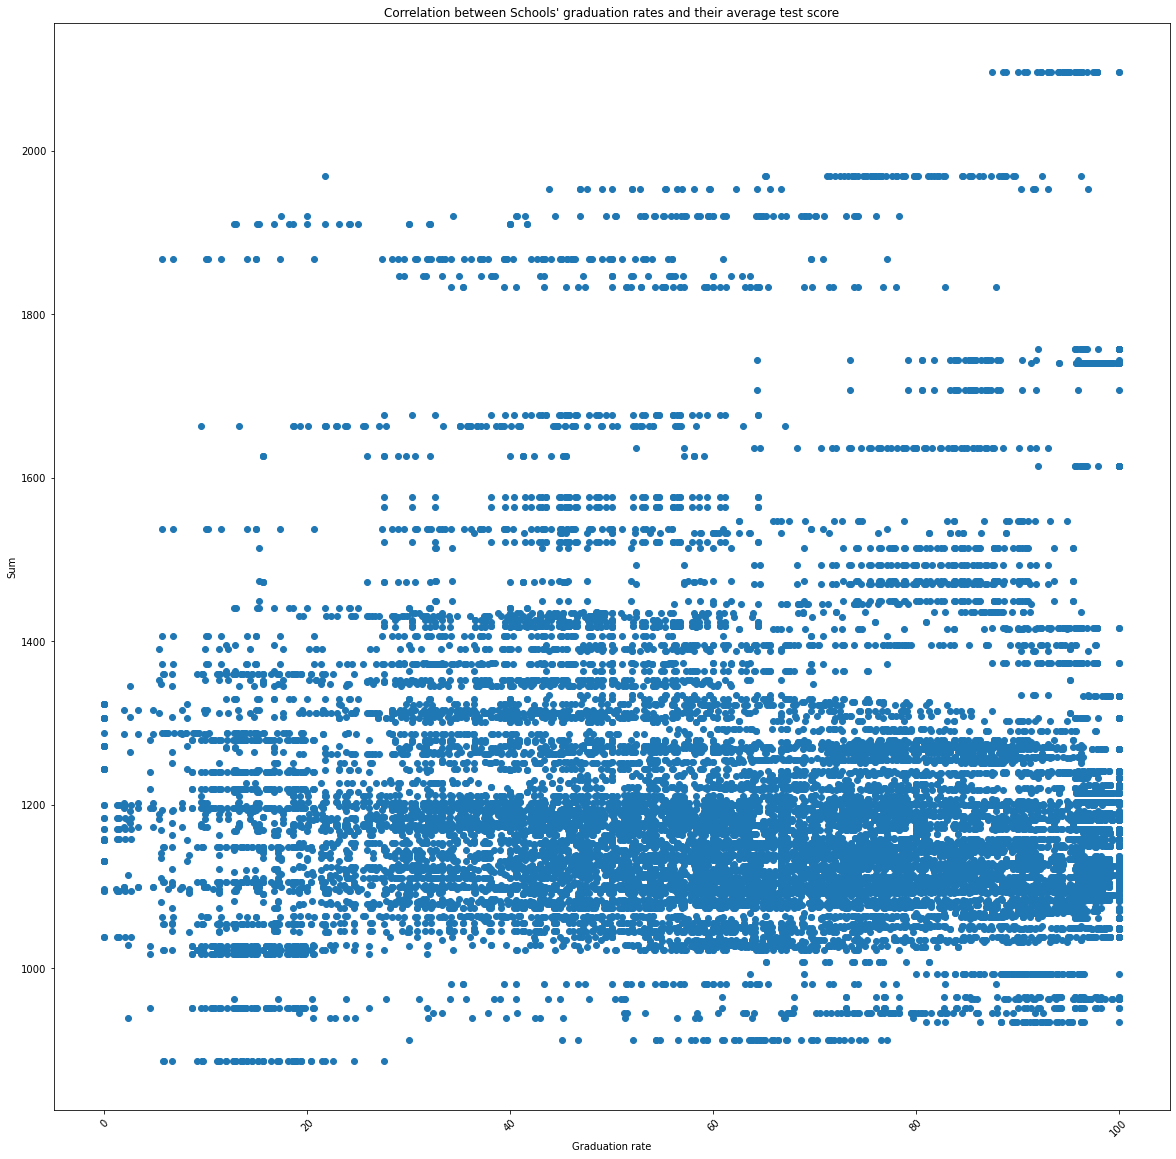

In [201]:
plt.rcParams["figure.figsize"] = (20,20)
plt.title('Correlation between Schools\' graduation rates and their average test score')
plt.scatter(merged['Graduation rate'], merged['Sum'])
plt.xlabel('Graduation rate')
plt.ylabel('Sum')
xt = plt.xticks(rotation=45)

As seen in the graph, schools with the highest graduation rates had the highest SAT scores of above 2000. The other scores are quite uniform across schools with varied graduation rates. However, schools with the lowest graduation rates tended to have lower SAT scores.

In [198]:
merged.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,Sum,Graduation rate
0,1M450,HIGH SCHOOL OF HOSPITALITY MANAGEMENT,58,1111,67.2
1,1M450,HIGH SCHOOL OF HOSPITALITY MANAGEMENT,58,1111,62.5
2,1M450,HIGH SCHOOL OF HOSPITALITY MANAGEMENT,58,1111,62.0
3,1M450,HIGH SCHOOL OF HOSPITALITY MANAGEMENT,58,1111,72.5
4,1M450,HIGH SCHOOL OF HOSPITALITY MANAGEMENT,58,1111,71.8


In [199]:
merged.to_csv('SATscoreGradrate.csv')